In [1]:
%cd ".."

/Users/yuta-fu/naist/diy-hyperspectral


In [2]:
import scipy.io
import matplotlib.pyplot as plt
from experiment import *
from experiment_setup import *
import sensor_data
import tape_data
import munsell_data 
import numpy as np
from color_utils import spec2spec

In [3]:
wp_hd = Waveplate(tape_data.THICKNESS_HD, tape_data.BIREFRINGENCE_HD)
wp_ss = Waveplate(tape_data.THICKNESS_SS, tape_data.BIREFRINGENCE_SS)

config1  = Config([129.7,   0.0],  75.1, [wp_hd, wp_ss])
config2  = Config([ 45.4,  91.0],   1.7, [wp_hd, wp_ss])
config3  = Config([172.0, 127.5],  83.7, [wp_hd, wp_ss])
config4  = Config([ 92.7,   3.4],   3.0, [wp_hd, wp_ss])
config5  = Config([104.8,  52.8], 179.5, [wp_hd, wp_ss])
config6  = Config([111.5, 102.3],  75.2, [wp_hd, wp_ss])
config7  = Config([125.6, 144.6],  19.6, [wp_hd, wp_ss])
config8  = Config([102.7, 116.5], 130.8, [wp_hd, wp_ss])
config9  = Config([152.7,   9.8],  51.7, [wp_hd, wp_ss])
config10 = Config([177.2,  86.8],  41.9, [wp_hd, wp_ss])

configs = np.array([config1, config2, config3, config4, config5, config6, config7, config8, config9, config10])

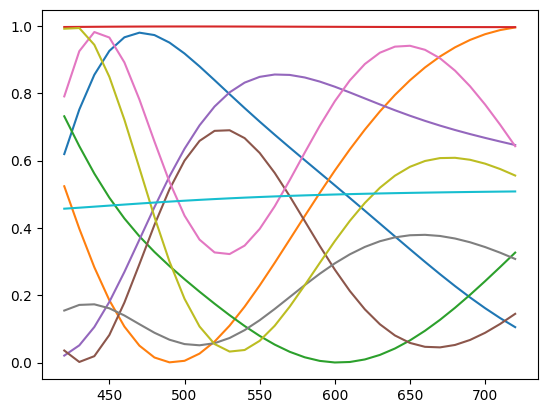

In [4]:
SQUARES_WAVELENGTHS = np.array([i * 10 for i in range(42, 73)])

for config in configs:
    # print(config.transmission(SQUARES_WAVELENGTHS))
    plt.plot(SQUARES_WAVELENGTHS, config.transmission(SQUARES_WAVELENGTHS))

In [5]:
# scene spectra

SQUARES = scipy.io.loadmat('naist_pbl/data/Colorchart.mat')['img']

# filter spectral transmittance
filters = np.array([config.transmission(SQUARES_WAVELENGTHS) for config in configs])

# sensor spectral transmittance
# sensor_response = np.array([spec2spec(sensor_data.SENSOR_DATABASE_WAVELENGTHS, spec, SQUARES_WAVELENGTHS) for spec in [
#                                 sensor_data.SENSOR_DATABASE_RESPONSE_R,
#                                 sensor_data.SENSOR_DATABASE_RESPONSE_G,
#                                 sensor_data.SENSOR_DATABASE_RESPONSE_B]]
#                            )
sensor_response = spec2spec(sensor_data.NIKON_WAVELENGTHS, sensor_data.NIKON_RESPONSE, SQUARES_WAVELENGTHS)
print(sensor_response.shape)
illuminants = spec2spec(munsell_data.ILLUMINANT_WAVELENGTHS, munsell_data.ILLUMINANTS, SQUARES_WAVELENGTHS)

# filters = np.array([config.transmission(wavelengths) for config in configs])
# experiment = measure_single(munsell_data.COLOR_CHECKER_WAVELENGTHS, munsell_data.COLOR_CHECKER_SQUARES, filters, sensor_response, illuminant_coefs, )
# sensor_response, illuminant_coefs = white_balance(None, True, True, )
# exp = Experiment(munsell_data.COLOR_CHECKER_WAVELENGTHS, sensor_response, filters, experiment, re)

(3, 31)


In [6]:
measure = measure(SQUARES, filters, sensor_response, SQUARES_WAVELENGTHS, illuminants)

: 